# 1. Blur Images: `cv2.blur()`

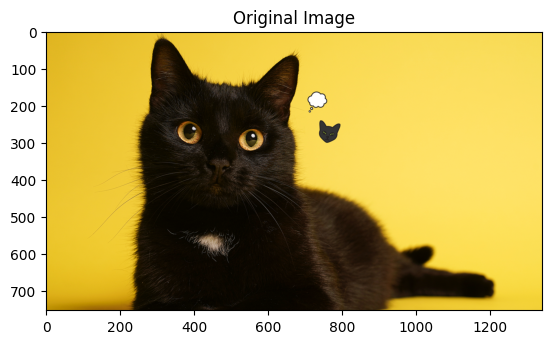

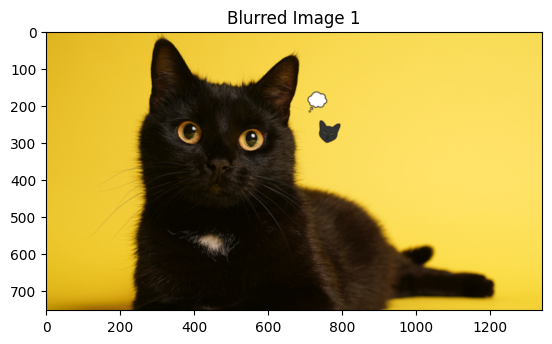

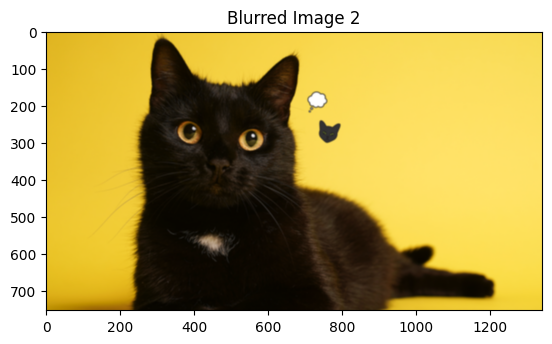

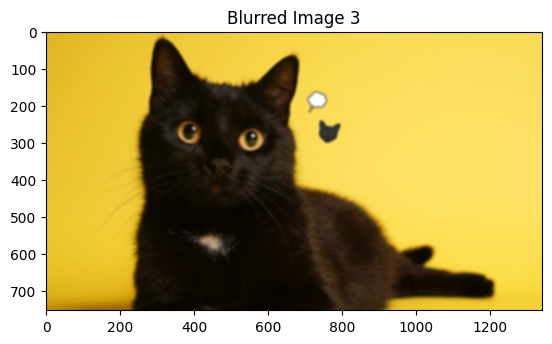

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load images
image_path = './data/cat2.png'
image = cv2.imread(image_path)
#image = cv2.imread(image_path, 0)  # '0': Gray scale, '1': Color

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Blur images
blurred_1 = np.hstack([
    cv2.blur(image, (3, 3)),
    cv2.blur(image, (5, 5)),
    cv2.blur(image, (9, 9))
])
blurred_2 = cv2.blur(image, (3, 3))
blurred_3 = cv2.blur(image, (5, 5))
blurred_4 = cv2.blur(image, (9, 9))

# Visualization
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow(blurred_2, 'gray')
plt.title('Blurred Image 1')
plt.show()
plt.imshow(blurred_3, 'gray')
plt.title('Blurred Image 2')
plt.show()
plt.imshow(blurred_4, 'gray')
plt.title('Blurred Image 3')
plt.show()

# 2. Gaussian Filter: `cv2.GaussianBlur()`

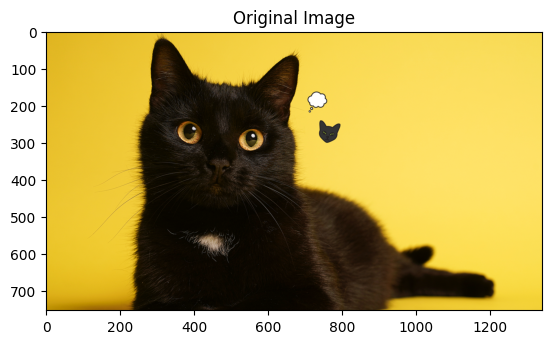

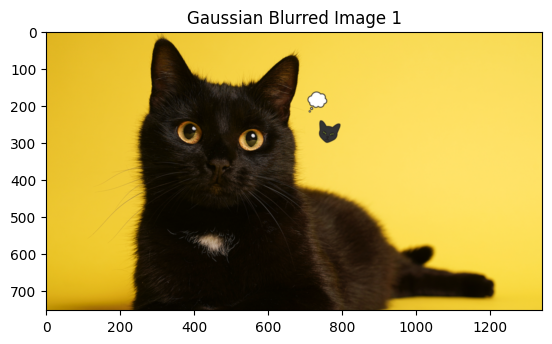

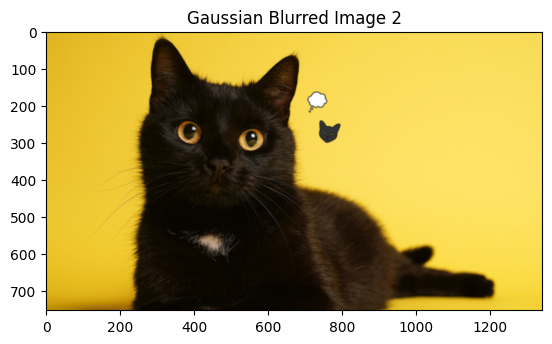

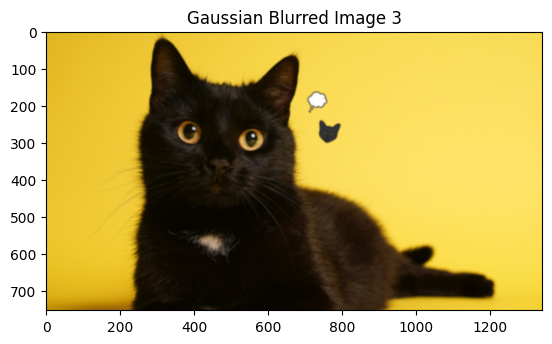

In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load images
image_path = './data/cat2.png'
image = cv2.imread(image_path)

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Gaussian Filter
Gaussian_blurred = np.hstack([
    cv2.GaussianBlur(image, (3, 3), 0),
    cv2.GaussianBlur(image, (5, 5), 0),
    cv2.GaussianBlur(image, (9, 9), 0),
])

blurred_2 = cv2.GaussianBlur(image, (3, 3), 0)
blurred_3 = cv2.GaussianBlur(image, (5, 5), 0)
blurred_4 = cv2.GaussianBlur(image, (9, 9), 0)

# Visualization
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow(blurred_2)
plt.title('Gaussian Blurred Image 1')
plt.show()
plt.imshow(blurred_3)
plt.title('Gaussian Blurred Image 2')
plt.show()
plt.imshow(blurred_4)
plt.title('Gaussian Blurred Image 3')
plt.show()

# 3. Sharpening Filter: Laplacian Filter

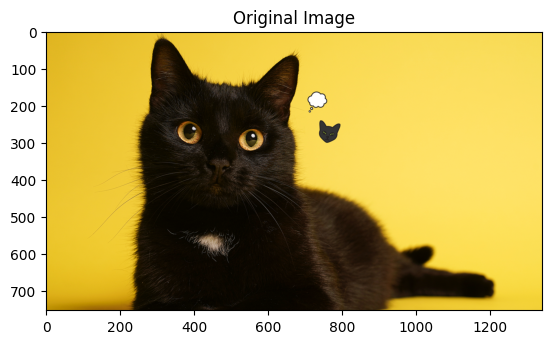

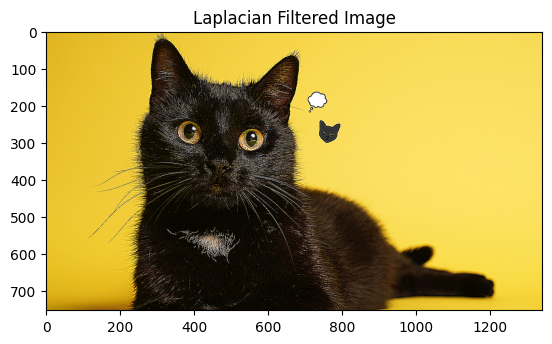

In [3]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load images
image_path = './data/cat2.png'
image = cv2.imread(image_path, 1)  # '1': Color

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a sharpening filter
filter = np.array([[-1, -1, -1],
                  [-1, 9, -1],
                  [-1, -1, -1]])

# Apply 'cv2.filter2D'
image_laplician = cv2.filter2D(image, -1, filter)

# Visualization
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow(image_laplician)
plt.title('Laplacian Filtered Image')
plt.show()

# 4. Sharpening Filter: Mexican Hat Filter

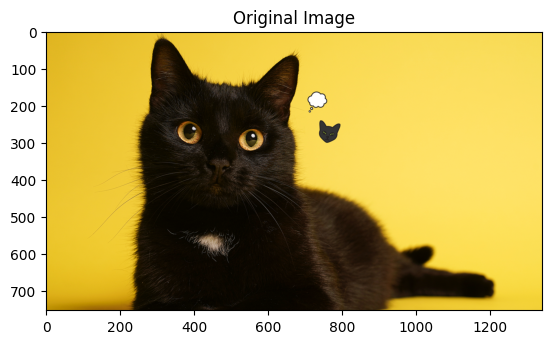

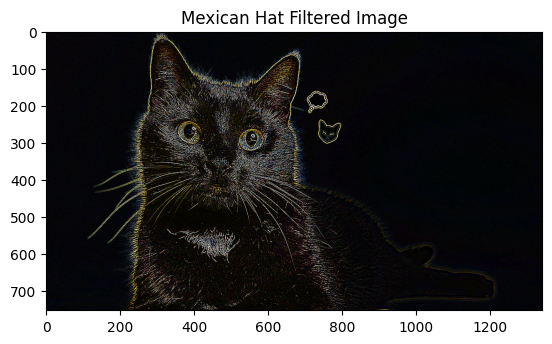

In [5]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load images
image_path = './data/cat2.png'
image = cv2.imread(image_path, 1)

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Mexican Hat Filter
filter = np.array([[0, 0, -1, 0, 0],
                 [0, -1, -2, -1, 0],
                 [-1, -2, 16, -2, -1],
                 [0, -1, -2, -1, 0],
                 [0, 0, -1, 0, 0]])
image_mexican_hat = cv2.filter2D(image, -1, filter)

# Visualization
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow(image_mexican_hat)
plt.title('Mexican Hat Filtered Image')
plt.show()

# 5. Custom Filters

## 5.1. Random Effect

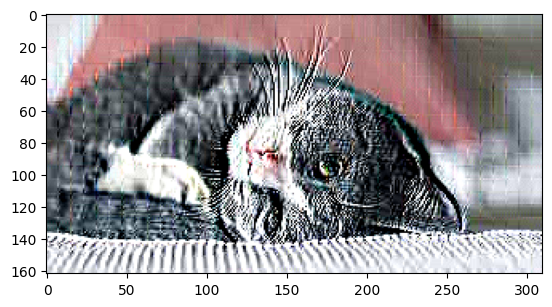

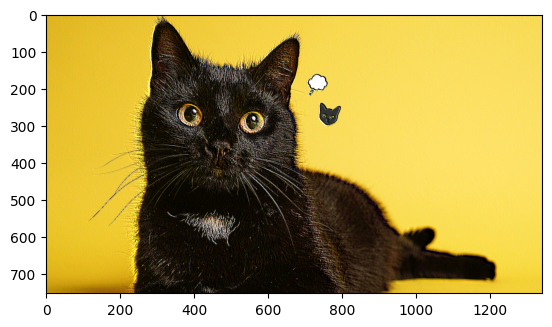

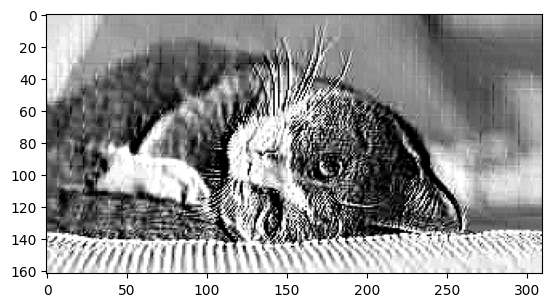

In [6]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob

# Load images
image_path = './data'

# Make a list of images using 'glob'
image_list = glob.glob(os.path.join(image_path, 'cat*.png'))

# Apply a filter to all images
for path in image_list:
    image = cv2.imread(path, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Create a custom filter
    filter = np.array([[1, 1, -2],
                       [-4, 6, -5],
                       [5, -1, -0]])
    
    # Apply the custom filter
    image_custom_filter = cv2.filter2D(image, -1, filter)
    
    # Visualization
    plt.imshow(image_custom_filter)
    plt.show()
    

## 5.2. Sepia Effect

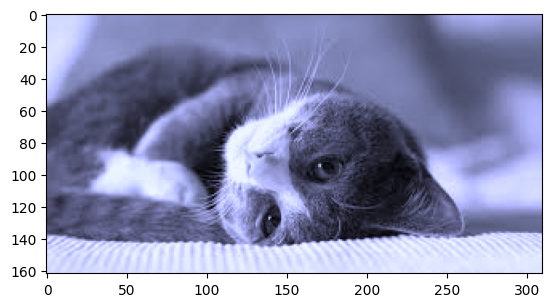

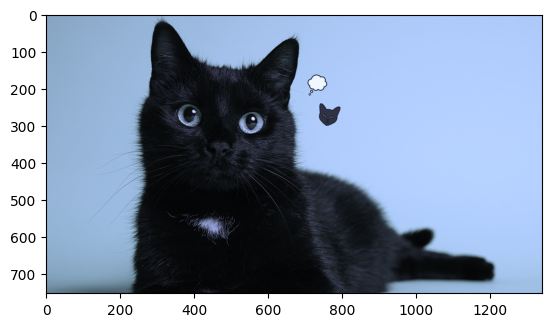

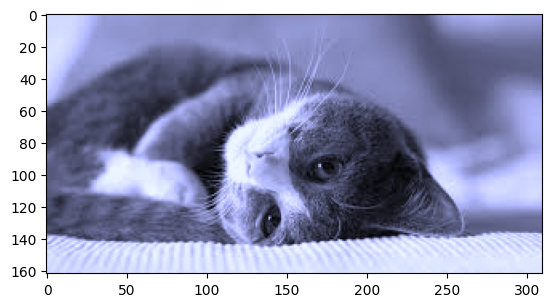

In [7]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import glob


# Load images
image_path = './data'

# Make a list of images using 'glob'
image_list = glob.glob(os.path.join(image_path, 'cat*.png'))

# Apply a filter to all images
for path in image_list:
    image = cv2.imread(path, 1)
    
    # Create a filter
    filter_ = np.array([[0.272, 0.534, 0.131],
                        [0.119, 0.686, 0.168],
                        [0.393, 0.769, 0.189]])
    
    # Appy the filter
    image_sepia = cv2.transform(image, filter_)
    
    # Visualization
    plt.imshow(image_sepia)
    plt.show()

## 5.3. Emboss Effect

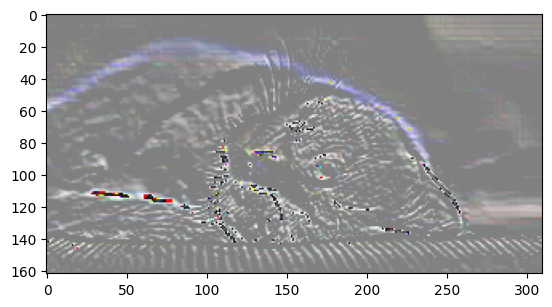

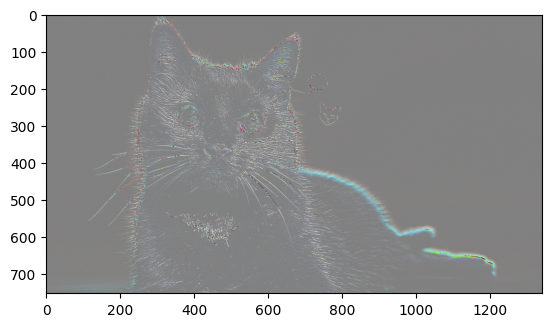

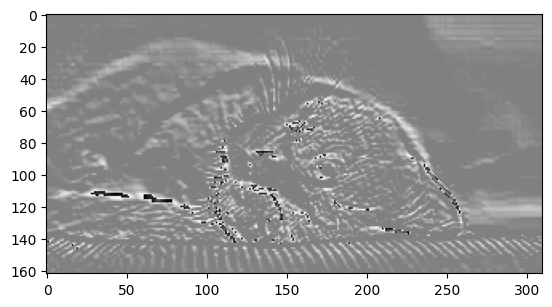

In [29]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob

# Create a path and list
image_path = './data'
image_list = glob.glob(os.path.join(image_path, 'cat*.png'))

# Apply a filter to all images
for path in image_list:
    image = cv2.imread(path, 1)
    
    # Create a filter
    filter_temp = np.array([[0, 1.5, 1],
                            [0, -0, 0],
                            [-1, -1.5, 0]])
    
    # Apply the filter
    image_emboss = cv2.filter2D(image, -1, filter_temp)
    image_emboss = image_emboss + 128
    
    # Visualization
    plt.imshow(image_emboss)
    plt.show()

# 6. Morphological Dilation and Erosion

- Basic concepts
  - White Pixels: Foreground or Objects of interest
  - Black Pixels: Background or Non-Object regions

- Dilation
  - Wthie-to-Black Transition: White pixels expand or grow

- Erosion
  - Black-toWhite Transition: White pixels erode or shrink

## Exercise 1

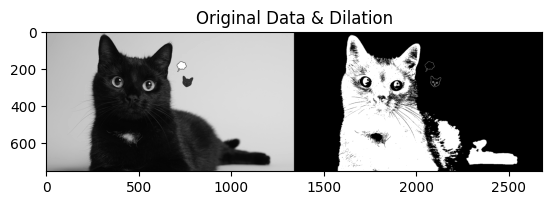

In [62]:
# Import module
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load images
image_path = './data/cat2.png'
image = cv2.imread(image_path, 0)


# Create a mask to inverse Binary Thresholding: `cv2.(cv2.THRESH_BINARY_INV)
_, mask = cv2.threshold(image, 
                        35,  # Threshold_value: pixels < 230 = White-to-Black transition
                        255,  # Max_Value: pixels > 255 = Black-to-White transition
                        cv2.THRESH_BINARY_INV)  # Inverse binary thresholding

# Make a list of images
image_list = np.hstack([
                        image, 
                        mask
                        ])
    
# Visualization
plt.imshow(image_list, 'gray')
plt.title('Original Data & Dilation')
plt.show()

## Exercise 2

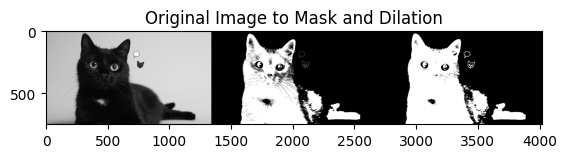

In [68]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load images
image_path = './data/cat2.png'
image = cv2.imread(image_path, 0)

# Create a kernel
kernel = np.ones((3, 3), np.uint8)

# Define dilation
dilation = cv2.dilate(mask, kernel)

# A list of images
image_list = np.hstack([
                            image,
                            mask,
                            dilation
                        ])

# Visualization
plt.imshow(image_list, 'gray')
plt.title('Original Image to Mask and Dilation')
plt.show()